In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data= pd.read_csv("datasets/data_with_nans.csv")


In [3]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [5]:
## gereksiz kolonların düşürülmesi

In [6]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [7]:
 data.drop(data.columns[0], axis=1, inplace=True ) #axis=1 yazdık çünkü 0. indexdeki kolonu tamamıyla atıyoruz.
    #inplace=true yaptık ve datayı data1 diye farklı degiskene eşitlemek zorunda kalmadan düzenledik.

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [9]:
data.describe() #kolonlardaki istatistiksel verileri verir

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.groupby("Species").agg(["min","max","std","mean"]) #gruplama, sınıflandırma yapmak icin !

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [11]:
data.isna() ######## isna() fonks. datasetteki hangi verilerin nan oldugunu verir.


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
165,False,False,False,False,False,False
166,False,False,False,False,False,False
167,False,False,False,False,False,False
168,False,False,False,False,False,False


In [12]:
data.isna().sum() # sum() ekleyerek daha kolay görselleşmiş hale getirdim

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [13]:
## ortalamsıyla doldurulabilir

In [14]:
data.dropna(axis=0, how="any", inplace=True) #nan olanları sildim, axis=0 ise yatayda silme ,1ise dikeyde / how "any" 
#any= satırdkilerin en az biri nan olursa siler
#all= satırdakilerin hepsi nan olursa silmek icin

In [15]:
data.isna().sum() #nan deger kalmadı

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
##ders2

In [17]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


<AxesSubplot:>

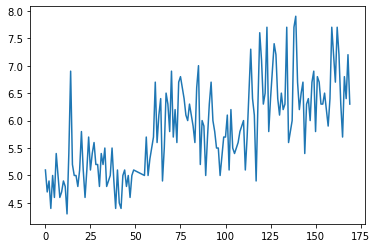

In [18]:
data["SepalLengthCm"].plot() #eklersek grafik üzerinde görselleştirir. fakat bizim datasette uygun sayısal veri yok 

<AxesSubplot:xlabel='Id', ylabel='SepalLengthCm'>

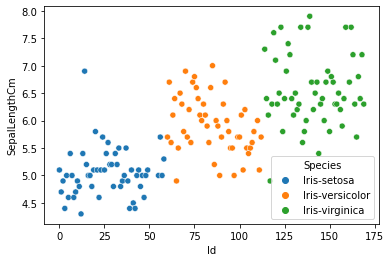

In [19]:
sns.scatterplot(data=data, x= "Id", y="SepalLengthCm", hue= "Species") #hue= sınıflandırmayı belirtir.
#belirli bir özellige göre datasetteki sınıfların dagılımını veren grafik. ****
#üstte kalan mavi yanlış sınıflandırılımış mesela

In [20]:
## datasetteki tğm özelliklerre göre sınıflandırmayı görelleştirmek icin döngü

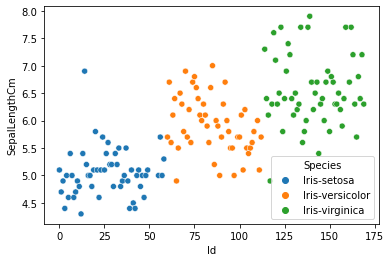

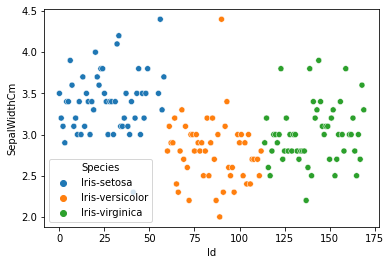

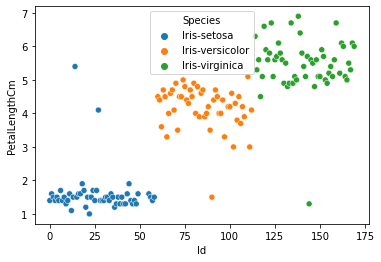

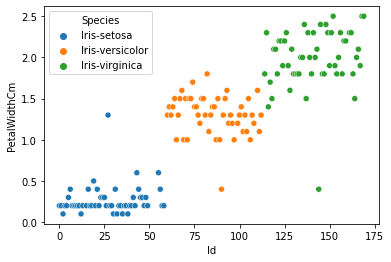

In [21]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue= "Species")
    plt.show()

In [22]:
#bu grafikler egitimden önce datasetimizi iyileştirmemizi kolaylaştırır. yanlış sınıflandırılmış birkaç veriyi gösterir.

In [23]:
## DERS3- OUTLİERS DETECTİON
#3 standart sapma- 3 sigma olarak da geçer.
#bu 3 ssden sonrasını outlier olarak kabul etmeyi temsil eder.

In [24]:
data["Species"]=="Iris-setosa"

0       True
1       True
2       True
3       True
4       True
       ...  
165    False
166    False
167    False
168    False
169    False
Name: Species, Length: 160, dtype: bool

In [25]:
#istedigimiz sınıfın istedigimiz sutununa gitek icin ***
selected_spect=data[data["Species"]=="Iris-setosa"] #tablodaki iris-setosa olan degerleri getirir sadece
selected_column= data_spect["SepalLengthCm"]
selected_column


NameError: name 'data_spect' is not defined

In [ ]:
#sectigimiz sınıfın bu sutunu icin 3standart sapma hesaplayalım
std= selected_column.std()
ort= selected_column.mean()
#ortalama + ss*3
three_sigma_plus= ort+ std*3
three_sigma_minus= ort- std*3 
#3sigma işlemlerini sınıflandırmada yanlış ya da uzak olanları tespit etmek icin kulllanıyoruz

In [ ]:
three_sigma_plus

In [ ]:
three_sigma_minus

In [ ]:
selected_column[((selected_spect["SepalLengthCm"] > three_sigma_plus) | (selected_spect["SepalLengthCm"] < three_sigma_minus))]
#14. indexde old goruluyor

In [ ]:
selected_column[((selected_spect["SepalLengthCm"] > three_sigma_plus) | (selected_spect["SepalLengthCm"] < three_sigma_minus))].index

In [ ]:
############## bu columnları tüm data sete uygulamamız lazım, döngü 


In [ ]:
data.columns # sadece sayısal degerdeki columnsları alıyoring [1:-1]
data.columns[1:-1]

In [ ]:
for columns in data.columns[1:-1]:
    for spec in data["Species"].unique(): #tekil olarak sadece uniq olan degerleri alıyoring
        selected_spect= data[data["Species"]== spec]
        selected_column= selected_spect[column]
        
        std= selected_column.std()
        ort= selected_column.mean()
        
        three_sigma_plus= ort+ std*3
        three_sigma_minus= ort- std*3 
        
        outliers=selected_column[((selected_spect[column] > three_sigma_plus) | (selected_spect[column] < three_sigma_minus))].index
        data.drop(index= outliers, inplace=True)
        print(column , spec,outliers)

In [ ]:
####### yukarıdaki çizdirme kodlarını tekrar yazıyoing bakmak için

In [ ]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue= "Species")
    plt.show()
    # 3 sslik dışarıda kalan verileri sildik

In [ ]:
## YENİ DERS  IQR-QUANTİLE
#interquartile range, outliersleri vs gosteren grafik, biz outliersleri atmak icin kullanıcaz

In [26]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spect= data[data["Species"]== spec]
        selected_column= selected_spect[column]
        
        q1= selected_column.quantile(0.25)
        q3= selected_column.quantile(0.75)
        
        iqr=q3-q1
        min= q1- ( 1.5* iqr)
        max= q3+ ( 1.5* iqr)
        
        print(column, spec, " | min=  ", min, " max= ", max)
        #buradaki outputtaki max ve min degerlerinin dısında kalan verileri atıyoringgg
        
        max_indx= data[( data["Species"]== spec) & (data[column]> max )].index
        print(max_indx)
        min_indx= data[( data["Species"]== spec) & (data[column]< min )].index
        print(min_indx)
        
        ## outliers degerleri düşürme yapıyoringg
        data.drop(index= max_indx, inplace=True)
        data.drop(index= min_indx, inplace=True)
        

SepalLengthCm Iris-setosa  | min=   4.199999999999999  max=  5.800000000000001
Int64Index([14], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor  | min=   4.549999999999999  max=  7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica  | min=   5.15  max=  7.950000000000001
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
SepalWidthCm Iris-setosa  | min=   2.35  max=  4.35
Int64Index([56], dtype='int64')
Int64Index([41], dtype='int64')
SepalWidthCm Iris-versicolor  | min=   1.75  max=  3.75
Int64Index([90], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica  | min=   2.1999999999999993  max=  3.8000000000000007
Int64Index([144], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa  | min=   1.0999999999999996  max=  1.9000000000000004
Int64Index([27], dtype='int64')
Int64Index([22], dtype='int64')
PetalLengthCm Iris-versicolor  | min=   3.1000000000000005  max=  5.4999

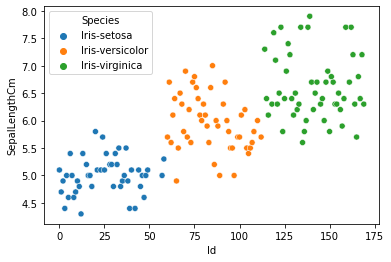

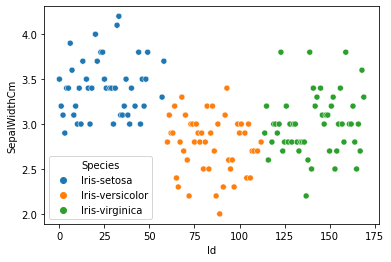

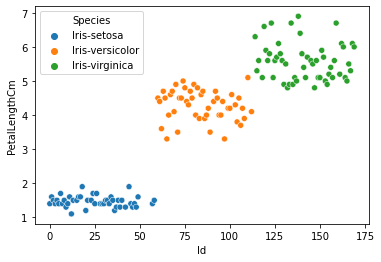

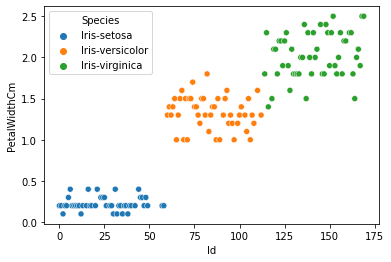

In [27]:
#### veriyi yine görsele döküyoring, yukarıda kodları c&p
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue= "Species")
    plt.show()
    

In [28]:
## sınıfların icindeki veriler sınıflandırılırken artık daha belirgin oldu
## SSyi cok daha azalttık,ss azaldı

In [29]:
# datamızı kaydediyoringgg
data.to_csv("final_data.csv")